
1. **Аналитическая часть**

Задача: Спрогнозировать ряд конечных свойств получаемых композиционных материалов.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline
# Импортируем один из пакетов Matplotlib
import pylab
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive = drive.mount('/content/drive')
data_folder = '/content/drive/My Drive/baumanka/diplom/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(data_folder + 'X_nup.xlsx', index_col=0)
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


(     Угол нашивки, град  Шаг нашивки  Плотность нашивки
 0.0                 0.0          4.0               57.0
 1.0                 0.0          4.0               60.0
 2.0                 0.0          4.0               70.0
 3.0                 0.0          5.0               47.0
 4.0                 0.0          5.0               57.0, None)

In [ ]:
df2 = pd.read_excel(data_folder + 'X_bp.xlsx', index_col=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


Пропусков нет, делаем объединение Inner.

In [ ]:
df = df.join(df2, how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

**Разведочный анализ данных.**

Выводим статистическую оценку датасета. Оцениваем наличие пропусков в данных, их примерные диапазоны, тип данных, количество и т.п.

In [ ]:
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,44.252199,6.899222,57.153929,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,45.015793,2.563467,12.350969,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.080033,49.799212,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,0.000000,6.916144,57.341920,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,90.000000,8.586293,64.944961,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


**Гистограммы распределения** каждой из переменной

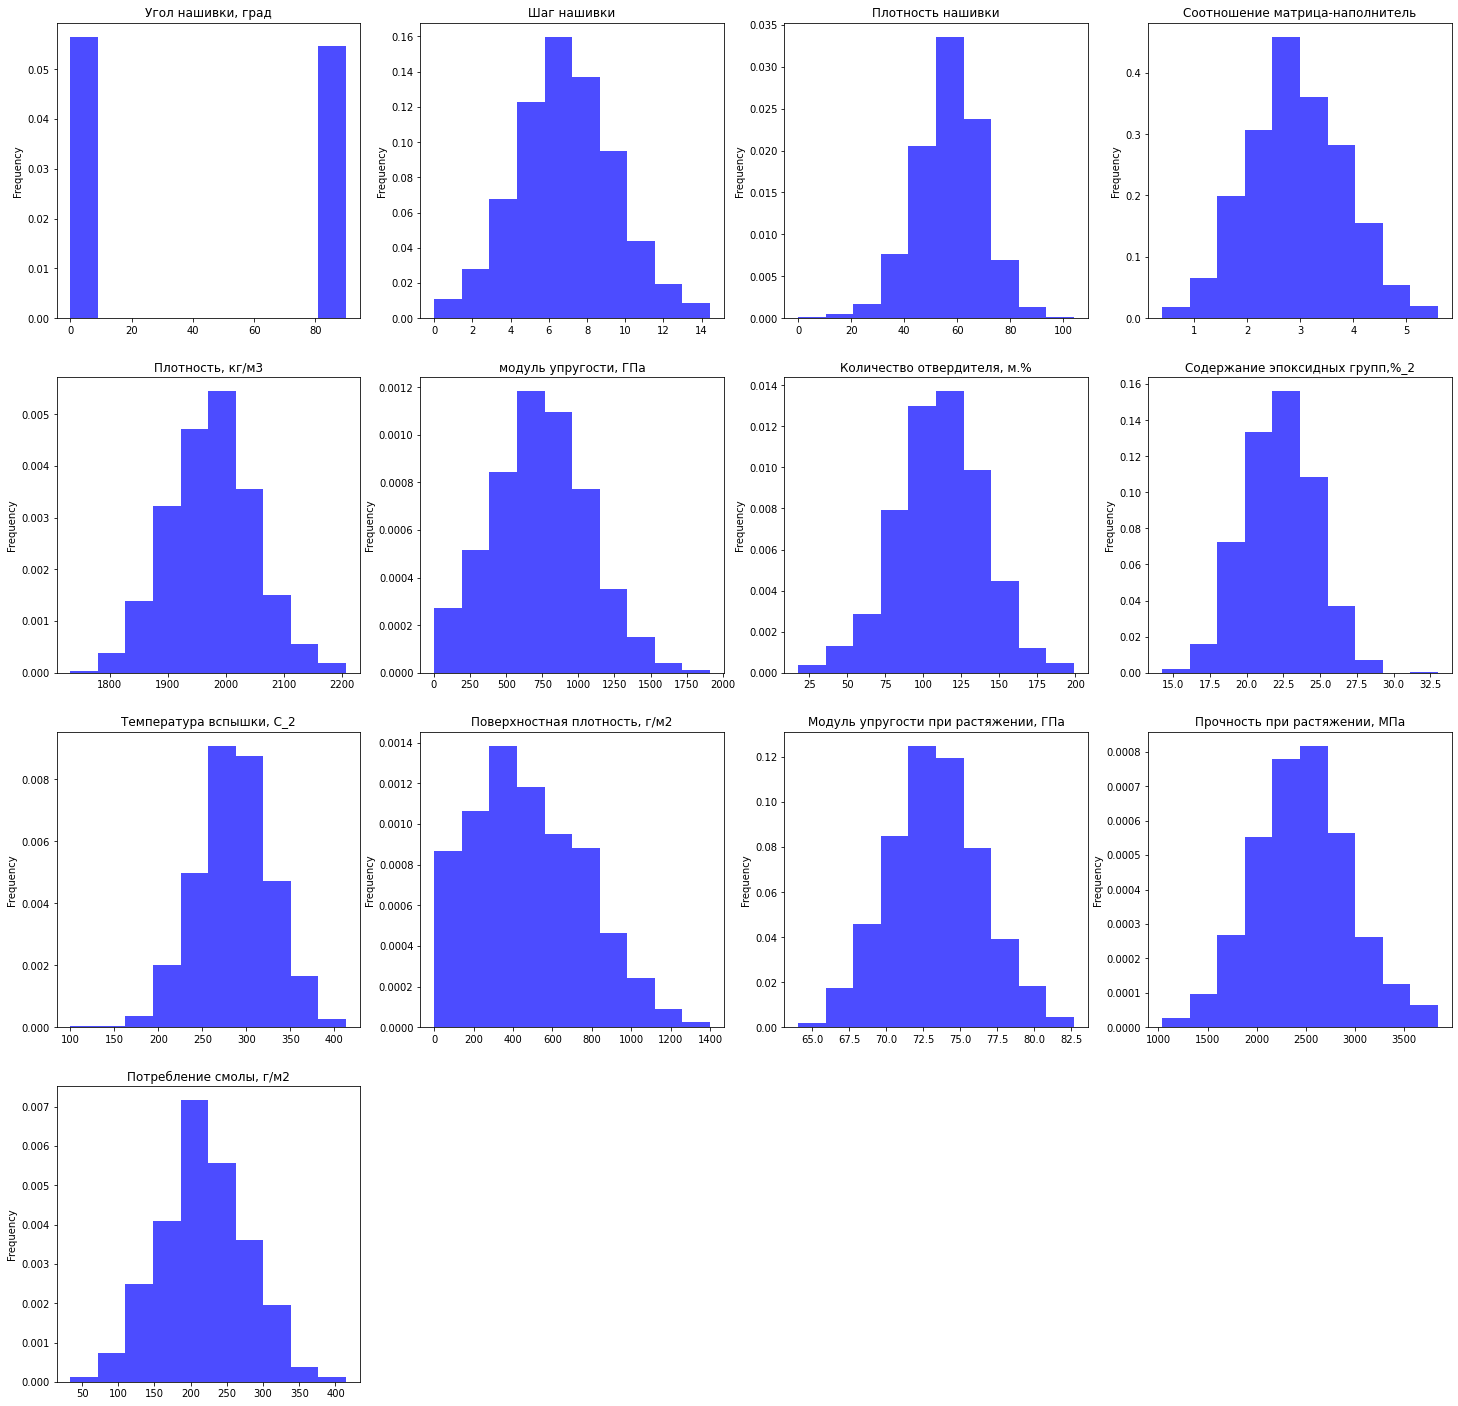

In [ ]:
columns = df.columns
plt.figure(figsize=(25, 25))
for i, context in enumerate(columns):
    #sns.set(context=context)  # Устанавливаем стиль
    plt.subplot(4, 4, i+1)  
    df[columns[i]].plot(kind='hist', density=1, stacked=False, alpha=.7, color='blue')
    plt.title(context)

Диаграммы показывают различные симметрии распределения данных. Предположительно есть выбросы у "Температура вспышки", "Содержание эпоксидных групп". "Угол нашивки" - категориальный признак.

**Диаграммы ящика с усами.**

Удаление выбросов с помощью визуальной оценки графиков с помощью оценки межквартильного интервала. Запускаем процедуру удаления выбросов до тех пор, пока на на графиках не останется точек за пределами усов

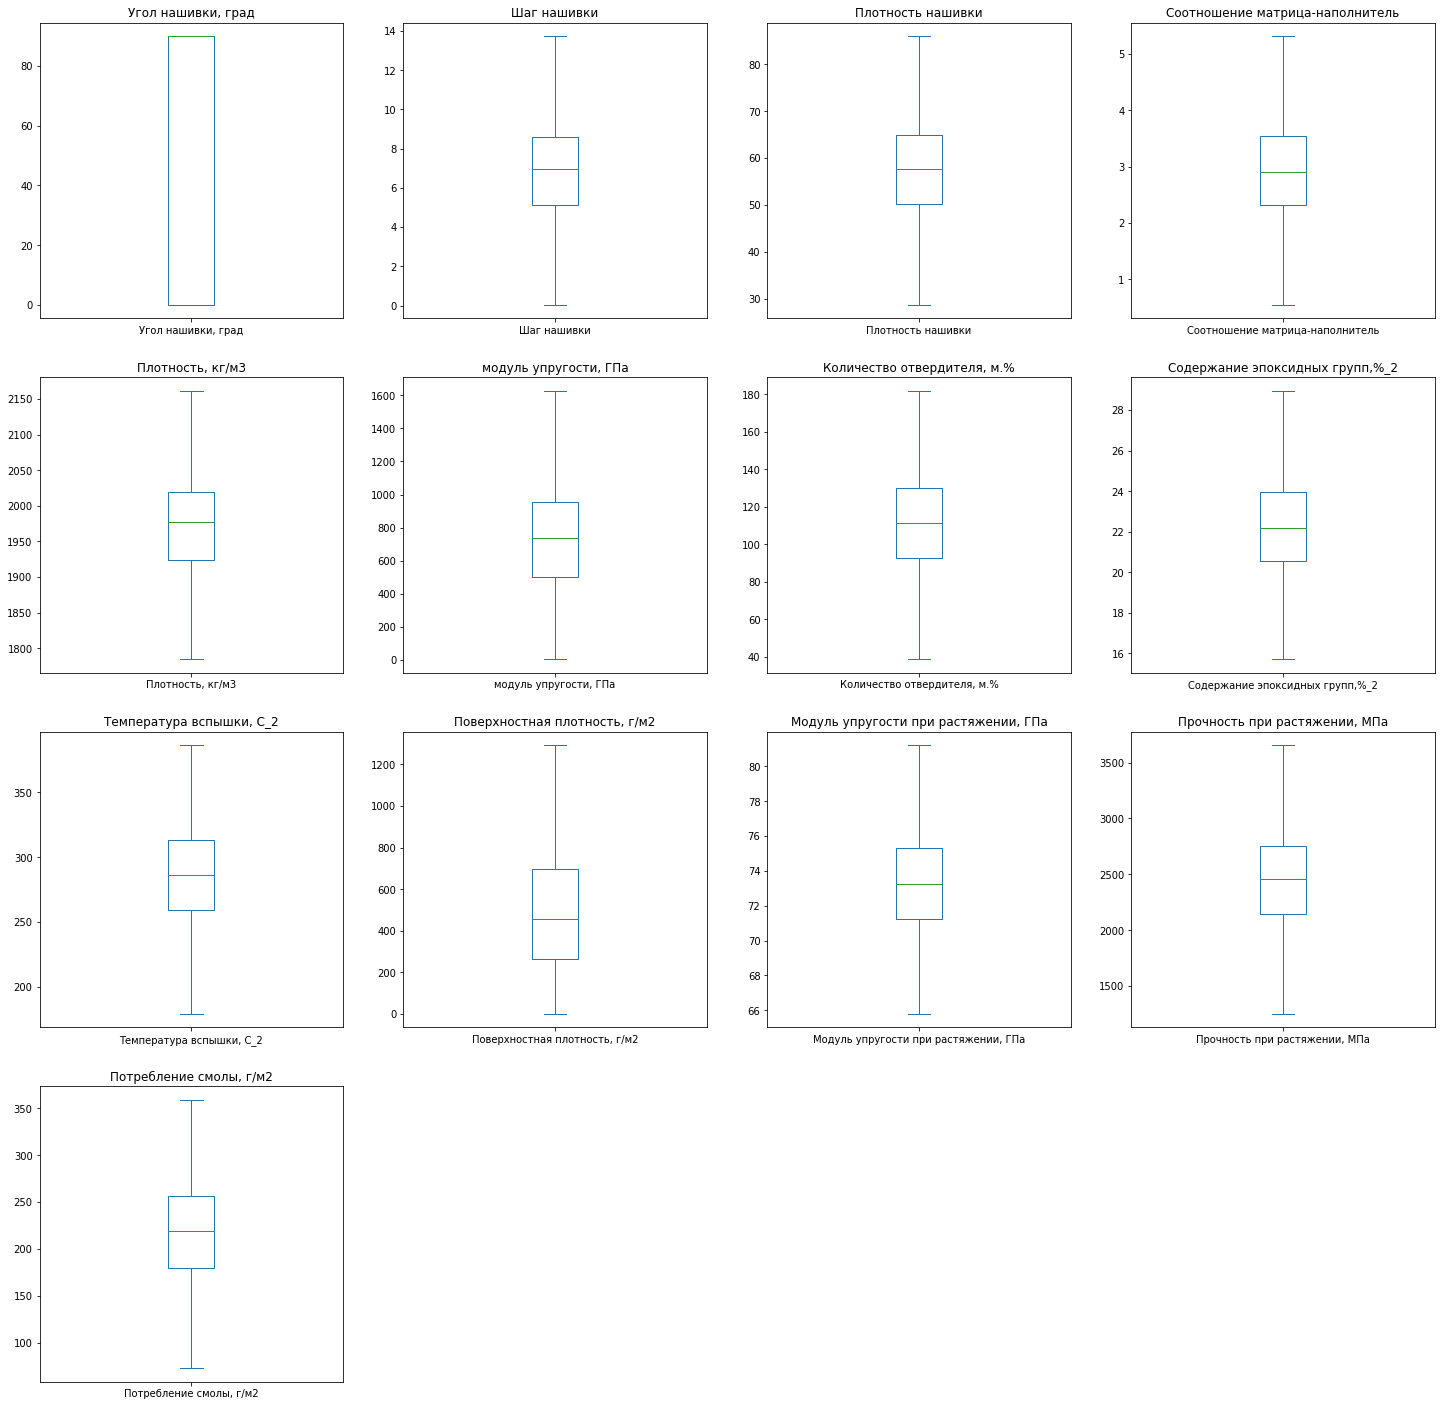

In [ ]:
#Проведем процедуру несколько раз, пока не убедимся в том, что выбросов нет ни на каком из графиков
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr) 
    min = q25-(1.5*intr_qr)
#Данные выходящие за диапазон заменяем на "ничто", затем такие строки удаляем.
    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan
    df = df.dropna(axis = 0)
columns2 = df.columns
plt.figure(figsize=(25, 25))
for i, context in enumerate(columns2):

    #sns.set(context=context)
    plt.subplot(4, 4, i+1)
    df[columns2[i]].plot.box(return_type='both')
    plt.title(context)

Оцениваем количество оставшихся данных. Было 1023, осталось 922. Удалено примерно 10 % данных. Процент не очень высок, продолжаем работу.

In [ ]:
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,45.976139,6.931939,57.562887,2.927964,1974.118744,736.119982,111.136066,22.200570,286.181128,482.429070,73.303464,2461.491315,218.048059
std,45.013829,2.514184,11.122204,0.895472,71.040648,327.607008,26.753228,2.393926,39.420764,280.437329,3.025864,453.564734,57.137475
min,0.000000,0.037639,28.661632,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.793845,1250.392802,72.530873
25%,0.000000,5.143644,50.275385,2.320191,1923.318006,498.538615,92.856591,20.556328,259.205321,264.345872,71.241213,2148.175736,179.875097
50%,90.000000,6.972862,57.584225,2.907832,1977.321002,736.178435,111.162090,22.177681,286.220763,457.732246,73.247594,2455.974462,218.697660
75%,90.000000,8.612094,64.840898,3.549367,2020.053266,956.955626,130.109815,23.956980,313.012786,695.531920,75.310130,2751.233766,256.623860
max,90.000000,13.732404,86.012427,5.314144,2161.565216,1628.000000,181.828448,28.955094,386.067992,1291.340115,81.203147,3654.434359,359.052220


**Попарные графики рассеяния точек.**

In [ ]:
#Получаем массив перечня индексов столбцов пар каждый с каждым и удаляем дубликаты. Иначе будет 156 графиков
columns = df.columns
pair = []
for i in range(len(columns)):
  for j in range(len(columns)):
    if (i < j): 
      pair.append([i, j])
    if (i > j) and [j, i] not in pair:
      pair.append([j, i])
len(pair)

78

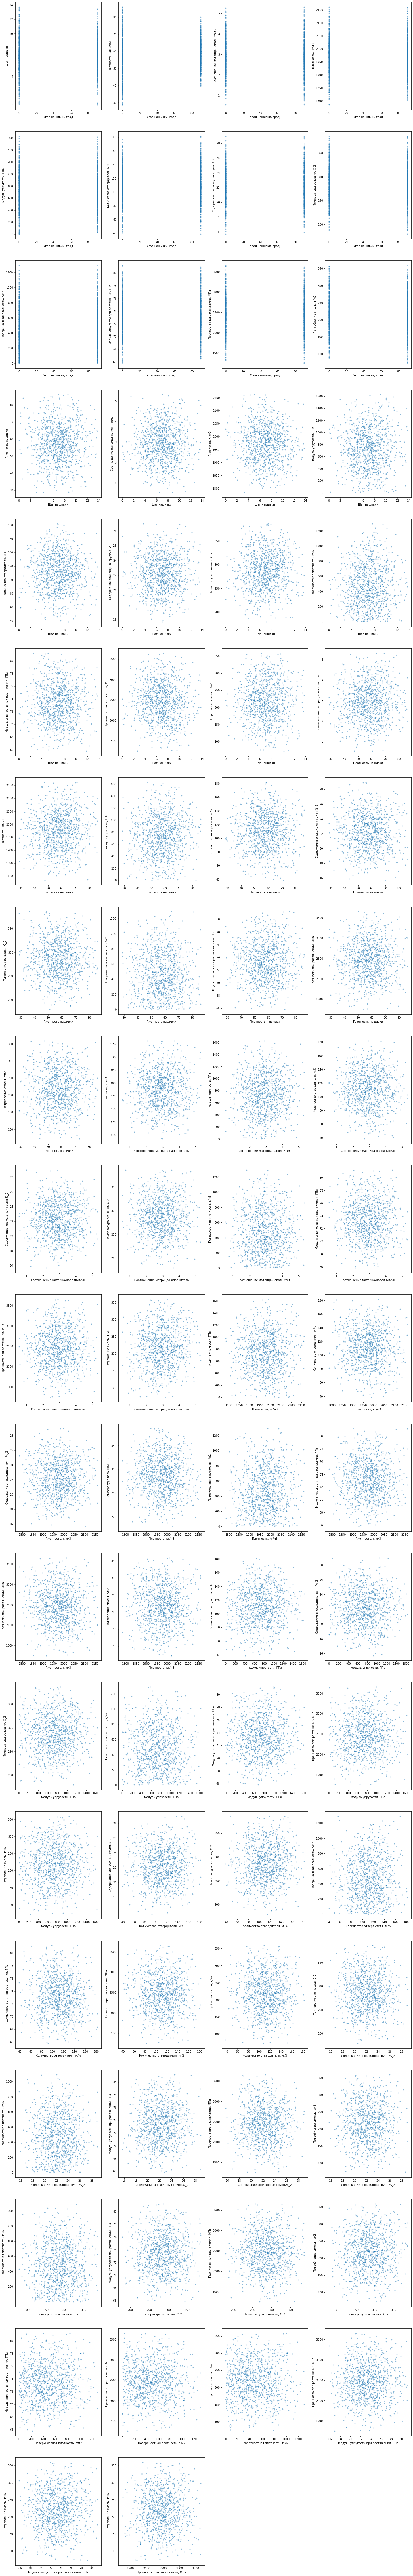

In [ ]:
plt.figure(figsize=(25, 250))
calc = 0
for i in pair:     

      col1 = columns[i[0]] #столбец 1
      col2 = columns[i[1]] #столбец 2
      calc+=1     
      plt.subplot(30,4, calc)
      plt.plot(df[col1], df[col2], 'o', 
              alpha=0.4, markersize=3)   
      plt.xlabel(columns[i[0]])
      plt.ylabel(columns[i[1]])

Попарное распределение не выявило визуальных корелляций. Построим корелляционную матрицу

In [ ]:
df.corr()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
"Угол нашивки, град",1.000000,0.021464,0.083564,-0.032144,-0.052993,-0.031490,0.034103,0.034520,0.002371,0.053180,0.031910,0.016144,0.000433
Шаг нашивки,0.021464,1.000000,0.000093,0.039924,-0.048648,0.010238,-0.017394,0.007571,0.034395,0.036931,-0.010193,-0.051580,0.009932
Плотность нашивки,0.083564,0.000093,1.000000,0.047835,0.086460,0.078810,0.007981,-0.034481,-0.015014,-0.034989,0.012488,0.016311,0.008012
Соотношение матрица-наполнитель,-0.032144,0.039924,0.047835,1.000000,0.007996,0.051643,0.001353,0.021982,-0.010565,0.011910,-0.024316,0.019141,0.076857
"Плотность, кг/м3",-0.052993,-0.048648,0.086460,0.007996,1.000000,-0.001416,-0.048938,0.004568,-0.021256,0.061496,-0.015597,-0.079188,-0.009609
"модуль упругости, ГПа",-0.031490,0.010238,0.078810,0.051643,-0.001416,1.000000,0.044550,-0.001442,0.037622,-0.007805,0.020063,0.031041,0.008368
"Количество отвердителя, м.%",0.034103,-0.017394,0.007981,0.001353,-0.048938,0.044550,1.000000,0.011429,0.070623,0.038762,-0.057026,-0.065711,-0.014827
"Содержание эпоксидных групп,%_2",0.034520,0.007571,-0.034481,0.021982,0.004568,-0.001442,0.011429,1.000000,-0.025315,-0.015844,0.053887,-0.013099,0.010808
"Температура вспышки, С_2",0.002371,0.034395,-0.015014,-0.010565,-0.021256,0.037622,0.070623,-0.025315,1.000000,0.020307,0.014168,-0.017263,0.048142
"Поверхностная плотность, г/м2",0.053180,0.036931,-0.034989,0.011910,0.061496,-0.007805,0.038762,-0.015844,0.020307,1.000000,0.033526,-0.027320,-0.012606


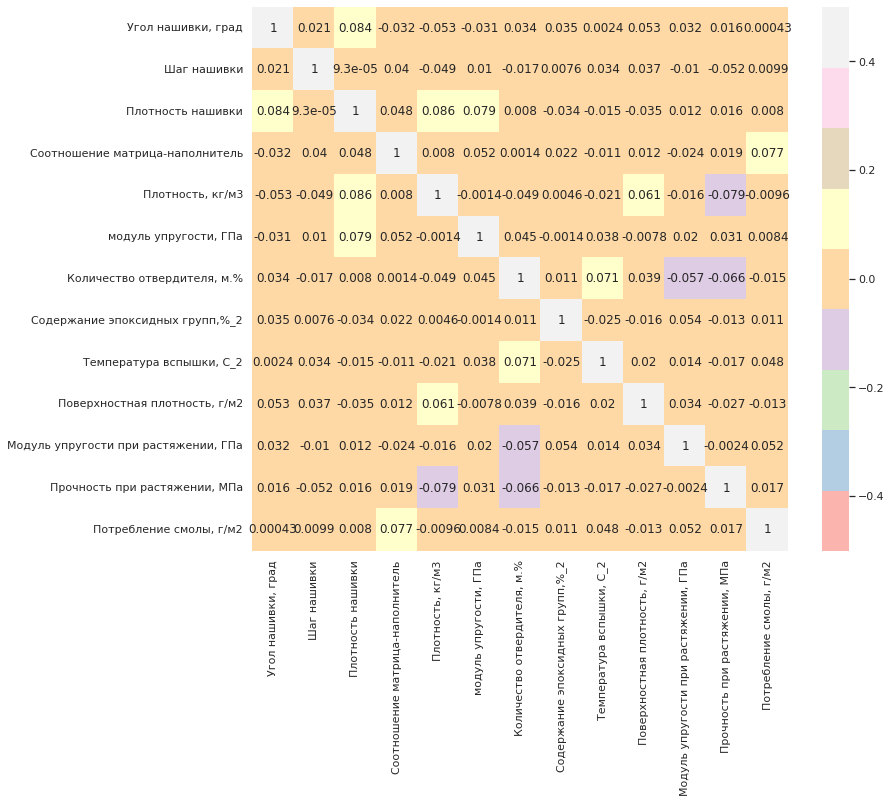

In [ ]:
#Поскольку кореляций выше уровня 0.3 нет, то ограничим вывод +-0.5 для наглядности"
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -.5, vmax = +.5, annot = True, cmap = 'Pastel1')

In [ ]:
df.corr().describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.089312,0.079441,0.096698,0.093201,0.067913,0.095399,0.077300,0.081122,0.087555,0.089042,0.085246,0.064834,0.091842
std,0.276141,0.278127,0.274559,0.274215,0.283727,0.273338,0.280274,0.277129,0.275771,0.275458,0.276617,0.283132,0.274218
min,-0.052993,-0.051580,-0.034989,-0.032144,-0.079188,-0.031490,-0.065711,-0.034481,-0.025315,-0.034989,-0.057026,-0.079188,-0.014827
25%,0.000433,-0.010193,0.000093,0.001353,-0.048648,-0.001416,-0.017394,-0.013099,-0.015014,-0.012606,-0.010193,-0.027320,0.000433
50%,0.021464,0.009932,0.012488,0.019141,-0.009609,0.020063,0.007981,0.007571,0.014168,0.020307,0.014168,-0.002393,0.009932
75%,0.034520,0.034395,0.078810,0.047835,0.007996,0.044550,0.038762,0.021982,0.037622,0.038762,0.033526,0.016753,0.048142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Численные показатели корелляций получились также низкими. Следовательно, работа методами линейной регрессии может дать неточный результат.

2. **Практическая часть**

Предобработка данных. Разработка и обучение модели.

**Нормализуем данные** и проверяем еще раз на коррелиции. (по идее, корреляция не должна измениться)

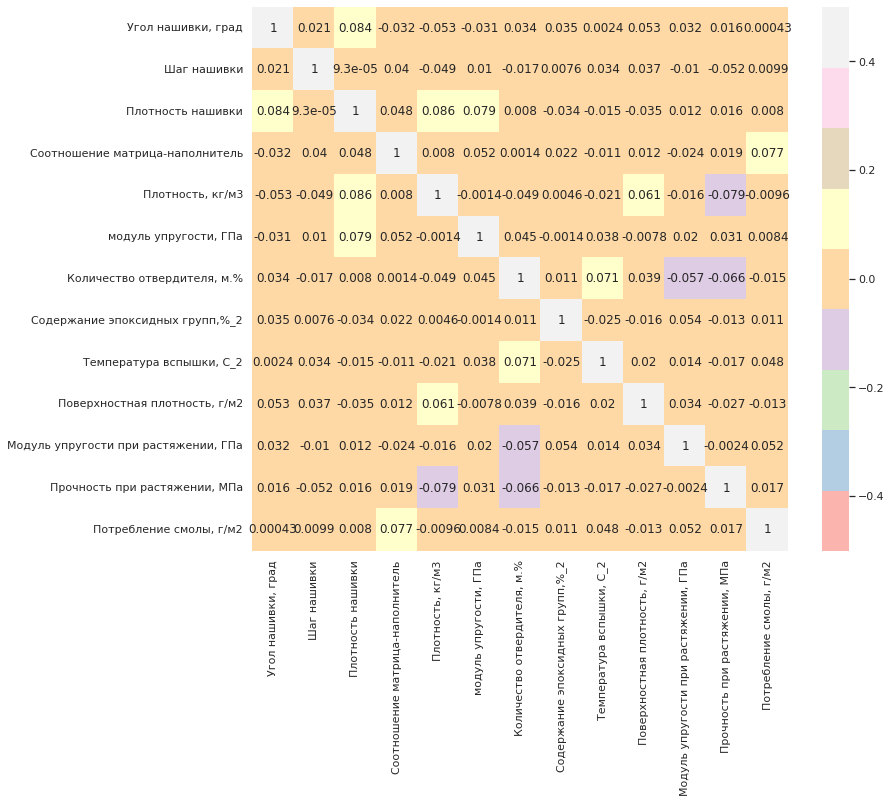

In [ ]:
scaler = MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 

sns.heatmap(df_norm.corr(), vmin = -0.5, vmax = +.5, annot = True, cmap = 'Pastel1')


**Случайный лес. Гиперпараметры. Обучающая и тестовая выборки.**

Построим модели "Случайного леса" для прогнозирования "Модуль упругости при растяжении". Используется поиск подбора гиперпараметров по сетке. Разбиение датасета на обучающую и тестовую выборки по уровню 0,3.

In [ ]:
df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1.0,0.0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,0.0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,0.0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
5.0,0.0,5.000000,60.000000,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
6.0,0.0,5.000000,70.000000,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,90.0,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,90.0,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,90.0,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,90.0,6.313201,58.261074,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X = df.drop('Модуль упругости при растяжении, ГПа', axis=1) #"Из данных столбцец с прогнозируемым параметром удаляем"
y = df['Модуль упругости при растяжении, ГПа'] #Берем этот столбцец в качестве "ответов"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Делим выборку

Подбираем гиперпараметры по сетке.

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': range (5, 51, 5), #Рисуем сетку гиперпараметров. (От, до, шаг).
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}

GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, 
cv=10, verbose=0) #сюда передаем сетку параметров, а также 10 - данные из задания

GSCV.fit(X_train, y_train)
GSCV.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 30}

**Обучение модели и оценка качества.**

Лучшие гиперпаратры получились {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 30}. Обучаем модель и оцениваем качество модели по MAE (среднеквадратичное отклонение).

In [ ]:
estimator = RandomForestRegressor(n_jobs=-1).set_params(**GSCV.best_params_) #передали лучшие гиперпараметры в модель
estimator.fit(X_train,y_train) #запустили обучение
y_predict = estimator.predict(X_test) #получили предсказание

In [ ]:
print ("R2 score:",r2_score(y_test,y_predict))   
print ("MAE:", np.mean(abs(y_predict - y_test)))

R2 score: -0.03150652469297066
MAE: 2.4847149369100605


In [ ]:
df_norm

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1.0,0.0,0.289334,0.546433,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.162230,0.272962,0.727777,0.514688
3.0,0.0,0.362355,0.319758,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.162230,0.272962,0.727777,0.514688
4.0,0.0,0.362355,0.494123,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688
5.0,0.0,0.362355,0.546433,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688
6.0,0.0,0.362355,0.720799,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,1.0,0.660014,0.320103,0.361662,0.444480,0.560064,0.337550,0.333908,0.703458,0.161609,0.473553,0.472912,0.183151
1019.0,1.0,0.768759,0.437468,0.607674,0.704373,0.272088,0.749605,0.294428,0.362087,0.271207,0.462512,0.461722,0.157752
1020.0,1.0,0.301102,0.679468,0.573391,0.498274,0.254927,0.501991,0.623085,0.334063,0.572959,0.580201,0.587558,0.572648
1021.0,1.0,0.458245,0.516112,0.662497,0.748688,0.454635,0.717585,0.267818,0.466417,0.496511,0.535317,0.341643,0.434855


Модель получилась не очень, потому что разница между квартилями меньше полученного среднеквадратичного отклонени. Но этого следовало ожидать, поскольку это регрессия линейная, а ранее мы обнаружили, что линейных зависимостей почти нет.

In [ ]:
import pickle
pickle.dump(estimator, open('model_RandomForestRegressor.pkl', 'wb'))

**Нейронная сеть.**

Перейдем к проектированию нейронной сети для предсказания "Соотношение матрица-наполнитель". Используем нормализованные данные. (Выше данные нормализовали и убедились, что корреляции остались без изменений. Поскольку линейных зависимостей мало, то заниматься работой с размерностью матрицы и выделелением каких-то компонент нет смысла, так как это линейные преобразования.



In [ ]:
X = df_norm.drop('Соотношение матрица-наполнитель', axis=1)
y = df_norm['Соотношение матрица-наполнитель']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#создадим нормализованный слой методами TF и подадим его в нейросеть
goal = np.array(X_train) #преобразуем из пандас в массив
goal_normalizer = layers.Normalization(input_shape=[12,], axis=None) #размерность вектора Х = 12
goal_normalizer.adapt(goal)

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,    
      layers.Dense(12, activation='sigmoid'),
      layers.Dense(6, activation='sigmoid'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error')
    return model

In [ ]:
model = build_and_compile_model(goal_normalizer)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 244
Trainable params: 241
Non-trainable params: 3
_________________________________________________________________


In [ ]:
history = model.fit(
    goal,
    np.array(y_train),
    validation_split=0.2,
    verbose=1, epochs=300)

Epoch 1/300
17/17 [==============================] - 0s 6ms/step - loss: 0.0290 - val_loss: 0.0366
Epoch 2/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0290 - val_loss: 0.0367
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.0367
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.0369
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0290 - val_loss: 0.0366
Epoch 6/300
17/17 [==============================] - 0s 5ms/step - loss: 0.0289 - val_loss: 0.0366
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.0371
Epoch 8/300
17/17 [==============================] - 0s 5ms/step - loss: 0.0291 - val_loss: 0.0377
Epoch 9/300
17/17 [==============================] - 0s 5ms/step - loss: 0.0288 - val_loss: 0.0367
Epoch 10/300
17/17 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.0366
Epoch 11/

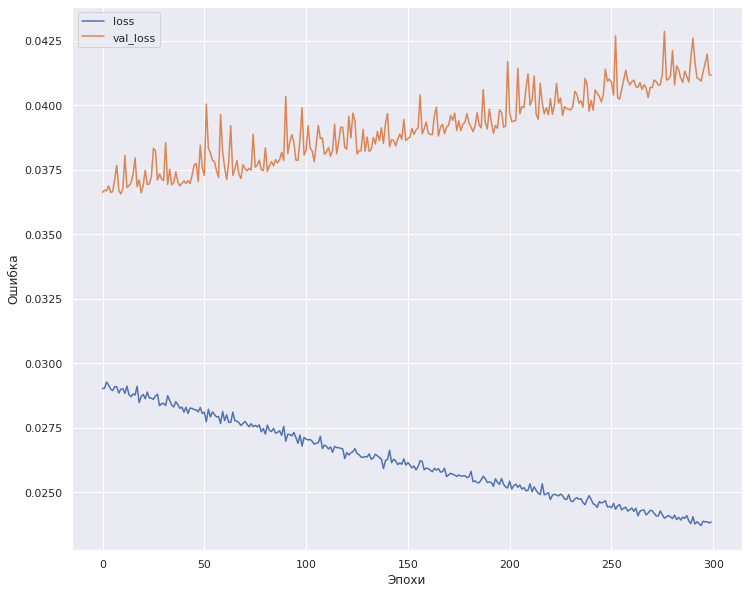

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_loss(hist):
  plt.plot(hist['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Эпохи')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)
  
plot_loss(hist)

In [ ]:
pred = model.predict(X_test)
r2_score(y_test, pred)

-0.316331804828041

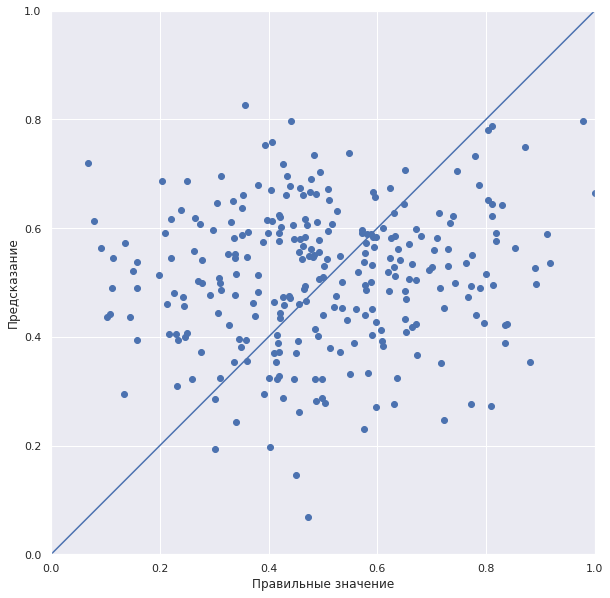

In [ ]:
labels_test = np.array(y_test).reshape(-1,1)


test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(labels_test, test_predictions)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказание')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
labels_test = np.array(y_test).reshape(-1,1)
test_predictions

array([0.37229452, 0.55721295, 0.4838384 , 0.47324544, 0.593597  ,
       0.4847395 , 0.4984758 , 0.3946852 , 0.46348608, 0.5627107 ,
       0.6580725 , 0.19753376, 0.36963415, 0.40368527, 0.45437238,
       0.2788114 , 0.5569039 , 0.66123617, 0.6062747 , 0.40929216,
       0.505608  , 0.4060913 , 0.5909729 , 0.52787733, 0.35375658,
       0.6114375 , 0.5915957 , 0.40718445, 0.6465292 , 0.59053713,
       0.58645713, 0.44305092, 0.32515737, 0.7326349 , 0.52377146,
       0.66464406, 0.67433715, 0.50525373, 0.3228053 , 0.5287885 ,
       0.5857277 , 0.61413693, 0.5911067 , 0.4889057 , 0.6705185 ,
       0.4760095 , 0.6205052 , 0.32192233, 0.6187588 , 0.42349946,
       0.70475227, 0.3245365 , 0.44086096, 0.4221904 , 0.4940417 ,
       0.40138823, 0.57475007, 0.44185212, 0.28557795, 0.5977237 ,
       0.55316734, 0.5837044 , 0.6619511 , 0.5824902 , 0.5813137 ,
       0.5456182 , 0.32250142, 0.6126104 , 0.35462114, 0.5099091 ,
       0.44424257, 0.566837  , 0.6335771 , 0.48640966, 0.56154

In [ ]:
# Предсказание vs правильный ответ
for i in range(len(pred)):
  print("Сеть сказала: ", pred[i], ", а верный ответ: ", labels_test[i], ", разница: ", pred[i] - labels_test[i])

Сеть сказала:  [0.37229452] , а верный ответ:  [0.27597072] , разница:  [0.0963238]
Сеть сказала:  [0.55721295] , а верный ответ:  [0.26217892] , разница:  [0.29503403]
Сеть сказала:  [0.4838384] , а верный ответ:  [0.62230014] , разница:  [-0.13846173]
Сеть сказала:  [0.47324544] , а верный ответ:  [0.76646278] , разница:  [-0.29321734]
Сеть сказала:  [0.593597] , а верный ответ:  [0.36246703] , разница:  [0.23112996]
Сеть сказала:  [0.4847395] , а верный ответ:  [0.65130573] , разница:  [-0.16656622]
Сеть сказала:  [0.4984758] , а верный ответ:  [0.74280825] , разница:  [-0.24433246]
Сеть сказала:  [0.3946852] , а верный ответ:  [0.15760752] , разница:  [0.23707769]
Сеть сказала:  [0.46348608] , а верный ответ:  [0.40936498] , разница:  [0.0541211]
Сеть сказала:  [0.5627107] , а верный ответ:  [0.09217072] , разница:  [0.47053998]
Сеть сказала:  [0.6580725] , а верный ответ:  [0.59538372] , разница:  [0.06268875]
Сеть сказала:  [0.19753376] , а верный ответ:  [0.40317714] , разница: 

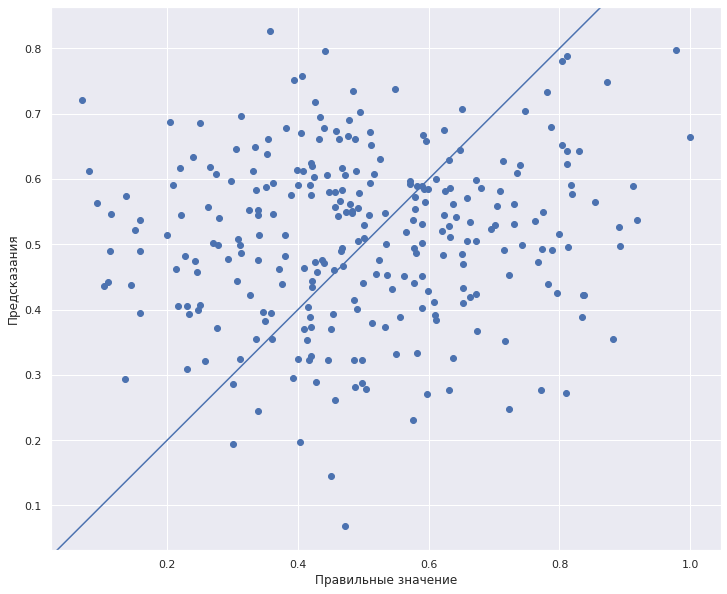

In [ ]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

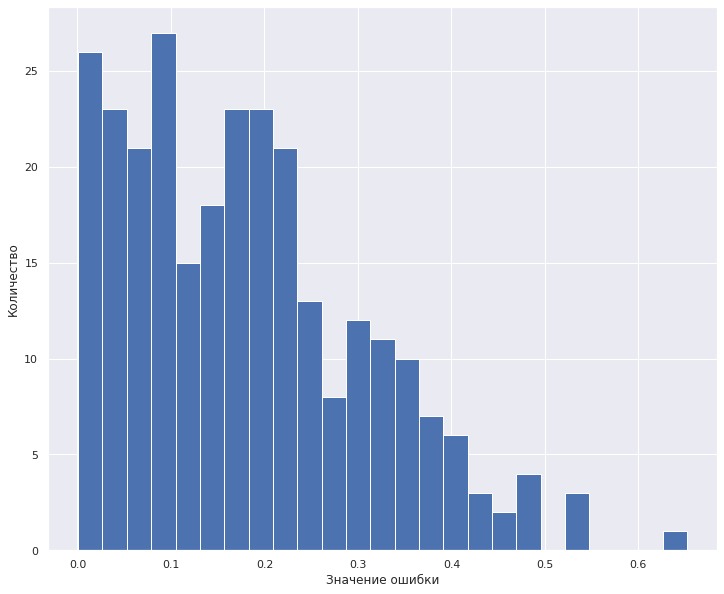

In [ ]:
#Разность предсказанного и правильного ответа
error = pred - labels_test
#Построение гистограммы
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()